# First checkpoint

In [1]:
# PATH = "drive/MyDrive/mgr/diffusion/result_path_jupyter/shared"
PATH = ".." # local
# DATA_DIR = "result_path_jupyter/data"
DATA_DIR = "data" # local

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

In [8]:
!ls $PATH/result_path_jupyter/data

cache  gen_1


In [4]:
!pip install diffusers transformers accelerate datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
import os
from diffusers import StableDiffusionPipeline


In [ ]:

pipe = StableDiffusionPipeline.from_pretrained(os.path.join(PATH, "result_path_jupyter", "model_1st_checkpoint"), safety_checker=None)
pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

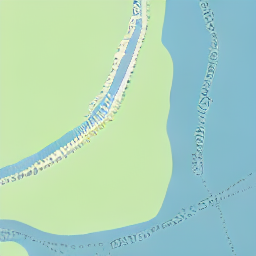

In [ ]:
img = pipe(prompt="OSM of area containing: 1 natural grassland  , 2 water rivers  , 3 waterway rivers  .")
img.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

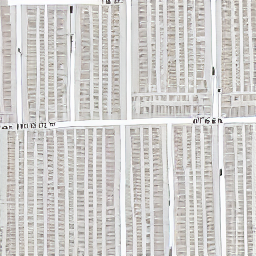

In [ ]:
img = pipe(prompt="OSM of area containing: 2 shop greengrocers  , 263 buildings  , 73 building garages  .")
img.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

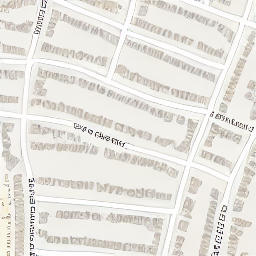

In [ ]:
green = pipe(prompt="OSM of area containing: 1 landuse farmland  , 1 natural grassland  , 1 leisure park  .")
green.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

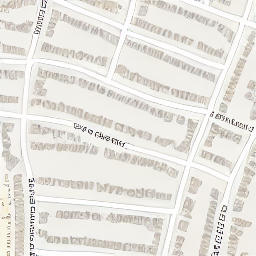

In [ ]:
pipe(prompt="OSM of area containing: many houses and one big shop").images[0]

## Catastrophic forgetting

  0%|          | 0/50 [00:00<?, ?it/s]

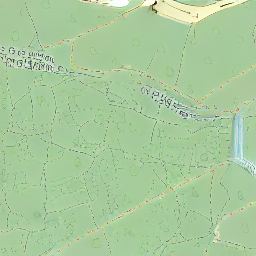

In [ ]:
pipe(prompt="knight with 2 swordes").images[0]

## Save samples

In [8]:
from datasets import load_dataset

ds = load_dataset("mprzymus/text2tile")["test"]
ds

Found cached dataset parquet (/home/marcin/.cache/huggingface/datasets/mprzymus___parquet/mprzymus--text2tile-08c7471b58d60160/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

Dataset({
    features: ['image', 'caption'],
    num_rows: 4136
})

In [13]:
from tqdm import tqdm
from PIL import Image


def save_img(start_id: int, imgs: list[Image.Image], dir: str):
    for i, img in enumerate(imgs):
        path = os.path.join(PATH, DATA_DIR, dir, f"{i+start_id}.png")
        img.save(path)


def generate_images(
    model: StableDiffusionPipeline, batch_size=16, start=0, dir="gen_1"
):
    for i in tqdm(range(start, ds.num_rows, batch_size)):
        prompts = ds["caption"][i : i + batch_size]
        imgs = model(prompt=prompts).images
        save_img(i, imgs, dir)

In [ ]:

generate_images(pipe)

In [4]:
import os
from diffusers import StableDiffusionPipeline


pipe = StableDiffusionPipeline.from_pretrained(
    os.path.join(PATH, "models", "model"), safety_checker=None
)
pipe = pipe.to("cuda")

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

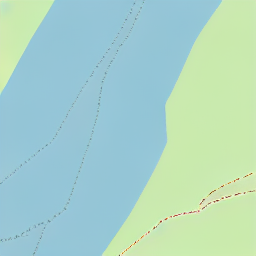

In [ ]:
img = pipe(prompt="OSM of area containing: 1 natural grassland  , 2 water rivers  , 3 waterway rivers  .")
img.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

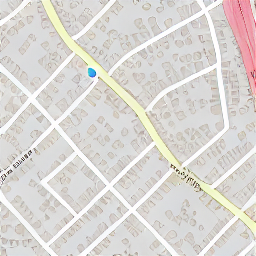

In [ ]:
img = pipe(prompt="OSM of area containing: 2 shop greengrocers  , 263 buildings  , 73 building garages  .")
img.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

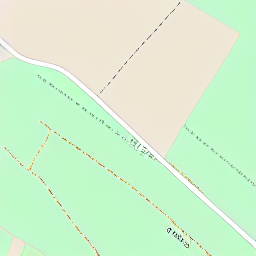

In [ ]:
green = pipe(prompt="OSM of area containing: 1 landuse farmland  , 1 natural grassland  , 1 leisure park  .")
green.images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

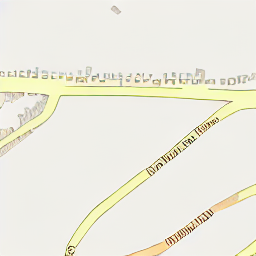

In [ ]:
pipe(prompt="OSM of area containing: many houses and one big shop").images[0]

In [ ]:
generate_images(model=pipe, batch_size=4, dir="gen")